# Life Expectancy

Alyssa Yu Lisza (0345766), Kong Li Wei (0343155), Ong Shi Hoong (0342065)

Data Science Principles

Taylor's University

## Abstract

Life expectancy is an important measure of a country’s wellbeing. Despite advancement in technology, declines and gaps in life expectancy still happen around the world. This paper investigates the relationship between different variables and life expectancy and aims to predict overall life expectancy to explain the causes of different scenarios of life expectancy around the world and to assist in producing measures to improve it. Exploratory data analysis was done to understand the data better and to determine variables that were highly correlated with life expectancy. Different supervised machine learning algorithms were compared for the predictive model. The result was that an increase in schooling years and income composition of resources as well as lower under-five deaths, adult mortality rate and deaths caused by HIV/aids, lead to higher life expectancy. Random Forest Regression was the best predictive model, with R2 score, 0.96, mean squared error, 3.45 and mean absolute error, 1.19. To conclude, the variables determined from the results should be taken into account for the improvement of future life expectancy.

## 1. Introduction

Life expectancy is an estimate of the average number of years a human can live up to. It is a measure that assumes the average age of death for those who were born in that specific year.[13] It can vary depending on the sex, age, race and geographic location. There are also multiple variables that influence it, such as infant mortality rates and GDP (Gross Domestic Product) among other factors. 

Life expectancy is an important indicator of a country’s welfare. It conveys the social and economic development as well as the quality of healthcare in the country.[11] An increase in it would indicate better living conditions and thus, this would be an aspiration every country would have. WHO (World Health Organization) reports that life expectancy has increased by more than 6 years from 66.8 years to 73.4 over the period of time 2000-2019.[27] However, the overall trend for life expectancy has been said to have a lower increase in years from 2011-2017 compared to the trend from 2004-2010 for developed countries.[7] It was also reported by the US National Center for Health Statistics that the United States was going through a decline in life expectancy by 0.3 years from 2014-2016.[14] 

This change could be caused by several factors, such as a decline in the quality of healthcare or due to socioeconomic trends.[14] The lack of improvement could mean that there is a stagnation in the advancement of a country, which would be a setback. Besides that, the life expectancy for developing countries is also said to be lower than developed countries.[13] This would mean that they would continue to have worser living conditions compared to developed countries, despite there being existing technology to improve it.

Thus, this study aims to predict the life expectancy of a person based on their background and evaluate which variables affect life expectancy the most to understand what is causing the lower gains in life expectancy and the difference in life expectancy between developing and developed countries. By predicting the life expectancy, the information obtained can be used in coming up with measures and initiatives to improve it.


## 2. Related Work

Based on the aim of the study, 15 articles related to life expectancy were found. The content of these articles is categorized into different sections of the taxonomy mapping. These sections include the data source, variables affecting life expectancy, data preprocessing, statistical techniques/methods, software, machine learning (ML) algorithms and performance metrics. 

#### Fig 2.1 Taxonomy Mapping

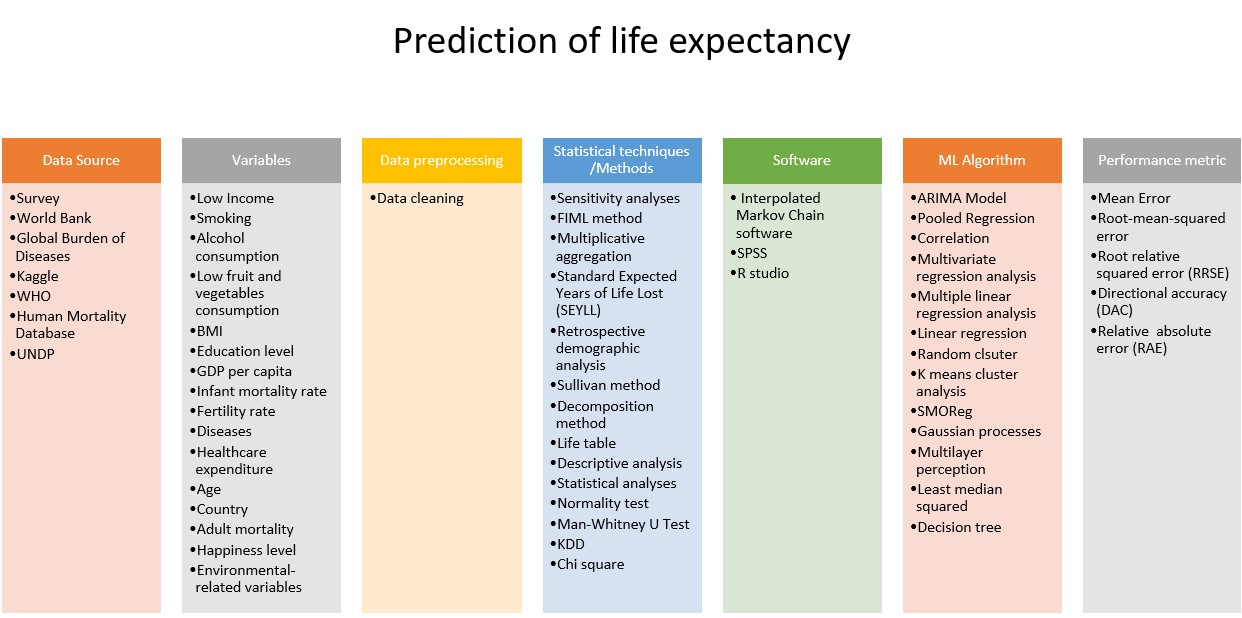

The first section on data sources includes the sources where the articles got their data from. This includes data from surveys [15,29], the World Bank [8-9,12,28], Global Burden of Diseases [10,19,28], Kaggle [20], WHO [12,28], Human Mortality Database [14] and UNDP [4]. In the second section, many variables that affect life expectancy were taken into account, though most articles considered just a few for their research. There were focuses on the effect of socioeconomic development (e.g. GDP per capita) [9], the effect of alcohol consumption [1,24], the effect of healthcare spending [8], the effect of diseases [10,16,17], the effect of obesity [29], and some used a range of variables to compare [12,15,19-20,28]. Then, the third section is the data preprocessing section, of which data cleaning is a part of.[4,20] This involves removing any missing values from the dataset. 

Moving on, each article used different methods to carry out the aim of their study. One such method used to find out the impact of risk factors was based on population attributable fractions that estimates the effect of the risk factors on social inequalities in mortality.[15] Sensitivity analyses was done to test the strength and accuracy of the statistical model.[15] The Full Information Maximum Likelihood (FIML) model assessed the effect of socioeconomic development on life expectancy.[9] Sensitivity analysis was also used on the results to test the effect of variables on life expectancy.[9] Multiplicative aggregation was used to estimate the effect of consumption of alcohol and smoking on life expectancy.[24] The SEYLL measure was used to determine the years of life lost.[1] Retrospective demographic analysis was done based on the category of diseases and used statistical analyses such as the Sullivan method, decomposition method and life tables to calculate changes in health adjusted life expectancy (HALE).[10] Another study did statistical analyses as well, which involved the use of a multistate life table.[29] Besides that, descriptive analysis and statistical analyses were used to observe the changes in life expectancy, HALE and the difference between them.[28] There was also the use of life tables to estimate life expectancy, with one based on gender for each country[14] and another for HIV infected/non-infected respectively[16]. KDD was used as the main technique in some studies.[4,20] One of them also made use of the normality test and Man-Whitney U Test to understand the data better and extract information.[20] Lastly, chi-square automatic interaction detector was also utilized to identity the variables correlated to life expectancy.[12]

The next section includes the software that some studies utilized when carrying out the methods. The Interpolated Markov Chain software [29], and SPSS [4,20] and R studio [20] were used. Beside this section is the section on ML algorithms that were run on the different studies’ datasets. Pooled regression and correlation were used for validating results.[8] The ARIMA model was used to forecast life expectancy, HALE and the difference between it [28] and forecast life expectancy as comparison to the SMOReg data mining algorithm, Least Median Squared and Gaussian Processes [4]. Multivariate regression analysis [17] and multiple linear regression analysis [28] showed the relationship of different variables on life expectancy. Other ML algorithms were used as well, such as linear regression, random forests and K Means Cluster analysis.[20] Besides that, the decision tree was another type of ML algorithm used.[12]

Lastly, the performance metric section consists of measures that determine how accurate and robust the results are. This includes R squared [9], mean error, root mean squared error (RMSE), root relative squared error (RRSE), directional accuracy and relative absolute error (RAE).[4]


Overall, these articles prove the importance of life expectancy and why it is of concern. They used various methods to carry out the aim of their studies, with it either being the investigation of the effect of specific variable(s) on life expectancy or the forecasting of life expectancy. Each study provided different insights as to how life expectancy can be improved. To conclude, in comparison to the previous studies, this study includes both the investigation of variables that correlate the most with life expectancy, as well as predicting it with a different purpose in mind.



## 3. Data and Methods

In [1]:
#loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split

In [2]:
#importing dataset
#data= pd.read_csv("Life Expectancy Data.csv")
data= pd.read_csv(r"C:\Users\new rog\Desktop\Life Expectancy Data.csv")
#data= pd.read_csv(r"C:\Users\yulis\Documents\Degree\sem4 stuff\Data Science\Group Assignment\Life Expectancy Data.csv")
df= pd.DataFrame(data)

### 3.1 Data

##### 3.1.2 Data source and description 

The "Life Expectancy" dataset is taken from Kaggle. This dataset is a compilation of data taken from the World Health Organization (WHO) and United Nations website by Deeksha Russell and Duan Wang. This dataset investigates a variety of factors that influence life expectancy. All predicting variables can be categorised into four groups: immunization-related factors, mortality-related factors, economic factors, and social factors. 

#### 3.1.3 Presentation, visualization and quantification of the data

This dataset has 2938 rows and 22 columns. There are 20 numerical features and 2 categorical features. All the features are numerical except for 'country' and 'status', which are categorical. Most of the numerical features are float, only 'year', 'infant_deaths', 'measles', and 'under-five_deaths' are integers.

#### 3.1.4 Statistical analysis

The table  shows the statistics of the dataset, which includes, the number of rows as "count", mean, standard deviation as "std", minimum value as "min", 25th, 50th and 75th percentile value, and the maximum value as "max". From the row "count", it can be seen that some columns have missing data as some columns do not have 2938 rows. 

In [3]:
print("Table 3.1.4 Statistical Description of the Independant Numerical Features")

Table 3.1.4 Statistical Description of the Independant Numerical Features


In [4]:
stats= df.describe()
pd.DataFrame(stats.T)

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


## 3.2 Methods

#### 3.2.1 Pre-Processing

Pre-processing is a necessary step before performing any analysis on the dataset since it converts a dirty dataset into a clean dataset. To address irrevelant and missing sections, data cleaning is performed on the dataset. First, the columns were renamed to remove space and capitalization so that the columns look neater. All of the column names were double-checked to see if they correctly represented the data and if any additional formatting was required. As the column 'thinness 1-19 years' was actually referring to the rate of thinness among people aged 10 to 19, it was renamed to 'thinness 1-19 years.' Then, each column was examined for outliers using the boxplot approach. All outliers were removed and replaced using the winsorization method. The final step in the pre-processing approach was to find all of the null values and replace them with the attribute's mean.

#### 3.2.2 EDA

For exploratory data analysis (EDA), univariate, bivariate and multivariate analysis was done. First, univariate analysis is done to show the distribution for each individual variable. For the continuous variables, a histogram is used to show this as it is suitable for the shape of distribution. From the distribution, the trend for each variable can be found, whether it is positive, negative or normal. For the categorical variable 'status', a bar chart is created to show the frequency of each status type to find out how much representation each country status has in the dataset. 

Next, bivariate analysis is carried out between the variable 'life expectancy' and 'year' to find out if there is a difference between the life expectancies of developing and developed countries over the years and by how much. A line graph is used to show this since the values are continuous. Moving on, multivariate analysis is done using a correlation matrix heatmap to find out which variables are highly correlated and affect life expectancy the most. Once the variables that are highly correlated are found, they are plotted against 'year' to find out if they have increased or decreased over time. This change will give more insights as to how it affects life expectancy. Line graphs are used as the values are continuous.

#### 3.2.3 Fitting Distributions

A Fitting distribution shows how well the data points of sepcific variable fits a statistical distribution. Fitting a distribution can let us know the probability or the frequency of occurence based on possible outcomes of an event. In this study, the target variable (life_expectancy, which is based on age) is fitted into different distributions and we will find out the best distribution for the data based on the comparision of maximum likelihood estimation, the Akaike's Information Criteria (AIC) and Bayesian Information Criteria (BIC) with other distributions. A higher log likelihood and lower AIC and BIC wiill indicate the better distribution for the dataset. The results created will be useful for future analysis on the life expectancy. 

#### 3.2.4 Features Selections

To select the best feature for the predictive models and performance metrics, the variables that are highly correlated to the target variable (life_expectancy) are selected. The high correlation values choosen for this study are either less than -0.6 or more than 0.6. The variables selected are 'adult_mortality', 'income_composition_of_resources', 'schooling', 'hiv/aids' and 'under-five_deaths'. A final correlation heatmap of these variables along with the the target variable is shown. 

#### 3.2.5 Predictive Models and Performance Metrics

Supervised machine learning algorithms are used in this study to build predictive models to predict the life expectancy of a person based on their background. The predicitve models are built using factors which has a higher correlation to the target attribute, 'life expectancy'. The factors selected are 'adult_mortality', 'income_composition_of_resources', 'schooling', 'hiv/aids' and 'under-five_deaths'. These features are separated from the dataset to build a new data frame, x. The target variable is also split from the original dataset into a new dataframe, y. These two dataframes, x and y, are then split into training and testing dataset with the ratio of 80:20. The predictive models used in this study are multiple linear regression, random forest regression and .  The performance of the models are evaluated using three performance metrics, mean absolute error, mean squared_error and r2 score. 

## 4. Results and Discussion

### 4.1 Pre-Processing

In this section, the process and results of pre-processing will be shown and explained. 

For consistency, all the columns is renamed to remove space and capitalization. Thinness_1-19_years is referring to the rate of thinness among people aged 10 to 19. The column is renamed to represent the attribute accurately. 

In [5]:
# cleaning column names
orig_cols = list(df.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
df.columns = new_cols

In [6]:
df.rename(columns={'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)

Fig 4.1 shows that most of the attributes have outliers. The outliers from each features have been removed using the winsorization method. The winsorization method converts extreme values to a specified data percentile. The  value for the specified data percentiles, also known as the 'upper limit' and 'lower limit' in the code, is determined by the percentage of the outliers above and below the maximum and minimum value. The Winsorization approach was chosen because we want to maintain all of the rows for comparison. Another reason for choosing the winsorization method is to get a realistic and accurate depiction of the dataset (Nicklin & Plonsky, 2020). The mean and standard deviation do not deviate a lot using this method compared to if we replace all outliers to the mean value.

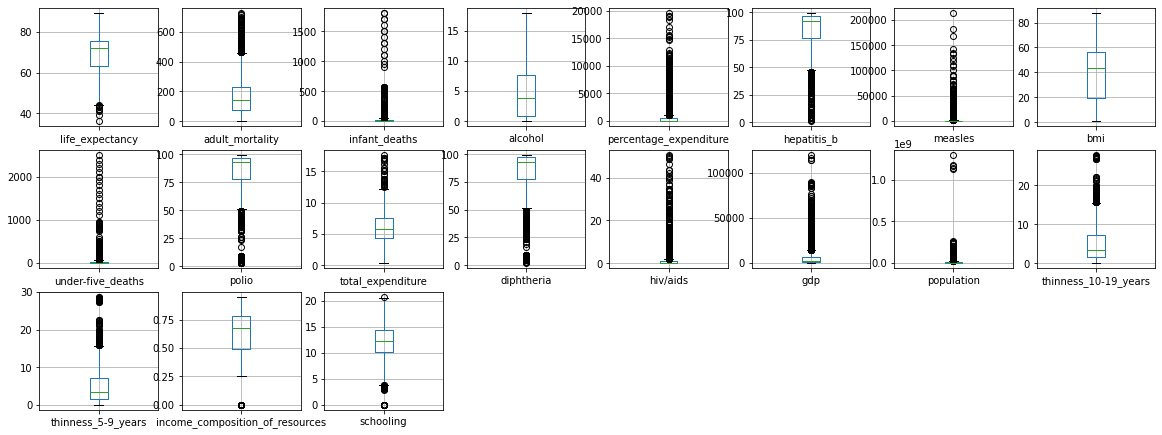

In [7]:
#identifying outliers using boxplot
cont_vars = list(df.columns)[3:]
plt.figure(figsize=(20,10))
for i, col in enumerate(cont_vars, start=1):
    plt.subplot(4, 8, i)
    df.boxplot(col)

In [8]:
txt="Fig 4.1: Boxplot for Every Feature Before Winsorization"
print(txt.center(124))

                                  Fig 4.1: Boxplot for Every Feature Before Winsorization                                   


In [9]:
def test_wins(col, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()

In [10]:
wins_dict = {}
test_wins(cont_vars[0], lower_limit=.01, upper_limit=0.01, show_plot=False)
test_wins(cont_vars[1], upper_limit=.04, show_plot=False)
test_wins(cont_vars[2], upper_limit=.15, show_plot=False)
test_wins(cont_vars[3], upper_limit=.07, show_plot=False)
test_wins(cont_vars[4], upper_limit=.135, show_plot=False)
test_wins(cont_vars[5], lower_limit=.15,upper_limit=.19, show_plot=False)
test_wins(cont_vars[6], upper_limit=.19, show_plot=False)
test_wins(cont_vars[7], upper_limit=.05, show_plot=False)
test_wins(cont_vars[8], upper_limit=0.14, show_plot=False)
test_wins(cont_vars[9], lower_limit=.1,upper_limit=0.01, show_plot=False)
test_wins(cont_vars[10], upper_limit=.09, show_plot=False)
test_wins(cont_vars[11], lower_limit=.11, upper_limit=0.01, show_plot=False)
test_wins(cont_vars[12], upper_limit=.19, show_plot=False)
test_wins(cont_vars[13], upper_limit=.19, show_plot=False)
test_wins(cont_vars[14], upper_limit=.24, show_plot=False)
test_wins(cont_vars[15], upper_limit=.04, show_plot=False)
test_wins(cont_vars[16], upper_limit=.05, show_plot=False)
test_wins(cont_vars[17], lower_limit=.045, upper_limit=.06, show_plot=False)
test_wins(cont_vars[18], lower_limit=.015, upper_limit=.06, show_plot=False)

In [11]:
#plt.figure(figsize=(20,5))
#for i, col in enumerate(cont_vars, 1):
    #plt.subplot(2, 10, i)
    #plt.boxplot(wins_dict[col])
#plt.tight_layout()
#plt.show()

In [12]:
wins_df = df.iloc[:, 0:3]
for col in cont_vars:
    wins_df[col] = wins_dict[col]

In [13]:
#finding null value and replacing the NA values
#df.isnull().sum()

In [14]:
# replacing NA values with mean
wins_df= wins_df.fillna(value=wins_df.mean(numeric_only=True))

In [15]:
#wins_df.isnull().sum()
#can be removed if not enough space

In this dataset, there are several variables that have null values, which include life_expectancy with 10 null values; adult_mortality with 10 null values; alcohol with 194 null values; hepatitis_b with 553 null values; bmi with 34 null values; polio with 19 null values; total_expenditure with 226 null values; diphtheria with 19 null values; gdp with 448 null values; population with 652 null values; thinness_10-19_years with 34 null values; thinness_5-9_years with 34 null values; income_composition_of_resources with 167 null values and schooling with 163 null values. These values are replaced with the mean values of each column. 

### 4.2 EDA

#### 4.2.1 Univariate Analysis

Infant_deaths, percentage_expenditure, hepatitis_b, measles, under-five_deaths, polio, diptheria, hiv/aids, gdp and population have u-shaped distribution while adult_mortality, alcohol, bmi, thinness_10-19_years, thinness_5-9_years and income_composition_of_resources have j-shaped distributions. The exceptions are life expectancy which has negative skew distribution, total_expenditure which has positive skew distribution, and schooling which has symmetrical distribution.

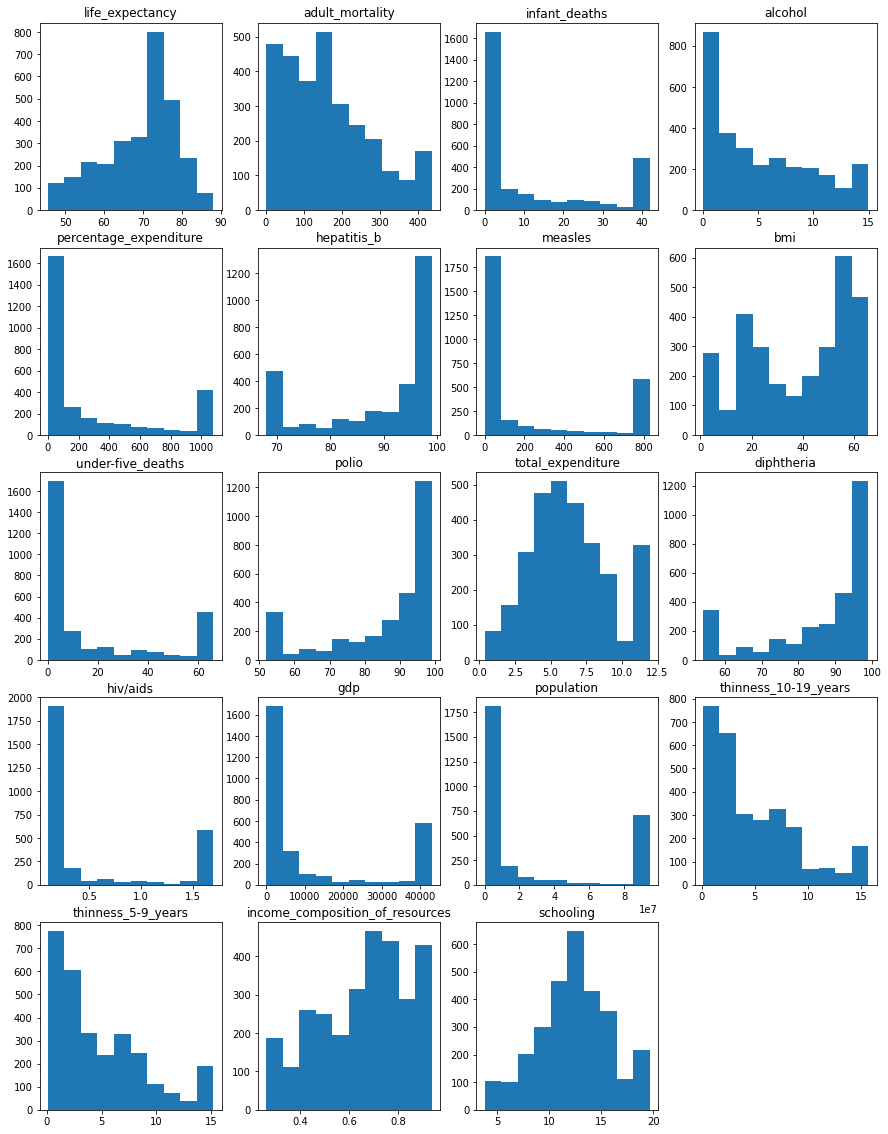

In [16]:
plt.figure(figsize=(15, 20))

for i, col in enumerate(cont_vars, 1):
    plt.subplot(5, 4, i)
    plt.hist(wins_df[col])
    plt.title(col)

Next, from the bar chart below, it can be seen that there is a much higher count of developing countries, so the accuracy of the results for 'Developing' countries may be higher. A possible reason for the huge difference may be that many countries are affected by environmental, economic or social factors. For example, the country may be in debt, has difficult terrain, low quality healthcare and/or lack of education. The effect of one or a combination of factors may prevent the countries from reaching the developed stage.

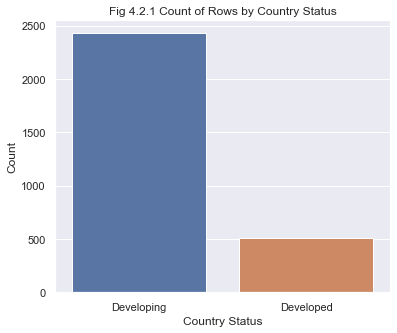

In [17]:
sns.set(rc = {'figure.figsize':(6,5)})
sns.countplot(x='status',data=wins_df)  
plt.title('Fig 4.2.1 Count of Rows by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Count')
plt.show() 

#### 4.2.2 Bivariate Analysis

For the results under bivariate analysis, it can be seen that developed countries have a higher life expectancy than developing countries by about 10 years. However, while developing shows a steady increase, developed has been stagnating.

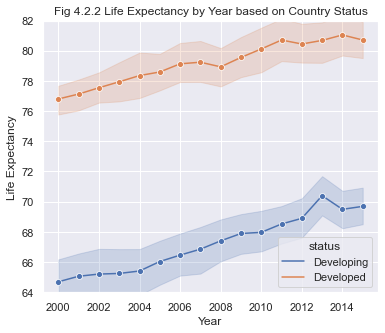

In [18]:
ax = sns.lineplot(x='year', y='life_expectancy', hue='status', data=wins_df, marker='o')
ax.set(ylim=(64, 82))
plt.title('Fig 4.2.2 Life Expectancy by Year based on Country Status')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

#### 4.2.3 Multivariate Analysis

The correlation matrix heatmap shown below provided insights on which variables were highly correlated to life expectancy, to each other and other findings.


Variables highly correlated with life expectancy : 
- hiv/aids (negative)
- adult mortality (negative)
- under-five deaths (negative)
- income composition of resources (positive)
- schooling (positive)

Variables highly correlated to each other: 
- under five deaths and infant deaths (positive)
- polio and diphteria (positive)
- thinness 5-9 years and thinness 10-19 years (positive)
- schooling and income composition of resources (positive)

Other findings:
- Population has the lowest correlation with life expectancy
- Income composition of resources and hiv/aids is relatively negatively correlated

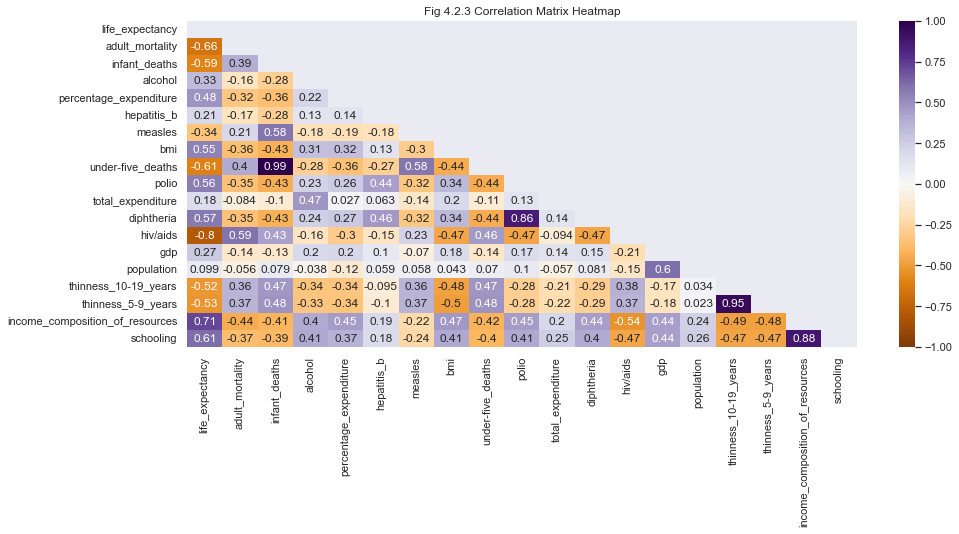

In [19]:
mask = np.triu(wins_df[cont_vars].corr())
plt.figure(figsize=(15,6))
sns.heatmap(wins_df[cont_vars].corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='PuOr', mask=mask)
plt.ylim(19, 0)
plt.title('Fig 4.2.3 Correlation Matrix Heatmap')
plt.show()

#### 4.2.4 Back to Bivariate Analysis

Next, the following five visuals are to show how the highly correlated variables to life expectancy have increased or decreased over the years based on their status. From the results in terms of Hiv/aids, it has decreased gradually for developing countries. For developed countries, it has remained the same. Basically, the number of infant deaths from Hiv/aids is very little for developed countries and is not increasing. The value may be the same constantly throughout the years because it is an estimate, since there are not many deaths to give an accurate number.

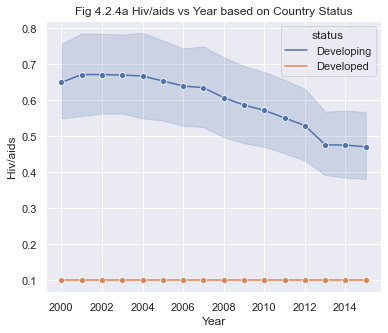

In [20]:
ax = sns.lineplot(x='year', y='hiv/aids', hue='status', data=wins_df, marker='o')
plt.title('Fig 4.2.4a Hiv/aids vs Year based on Country Status')
plt.xlabel('Year')
plt.ylabel('Hiv/aids')
plt.show()

From the results in terms of adult mortality below, it has decreased slightly over the years for both developed/developing countries, but it stagnated slightly for developed countries near the end of the timeline. It can also be seen that developed countries have a lower death rate for adults. 

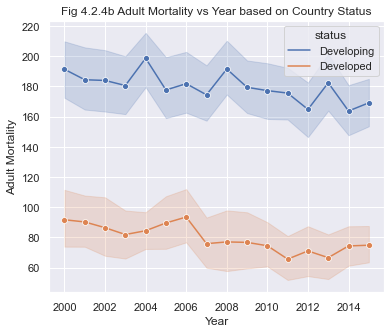

In [21]:
ax = sns.lineplot(x='year', y='adult_mortality', hue='status', data=wins_df, marker='o')
plt.title('Fig 4.2.4b Adult Mortality vs Year based on Country Status')
plt.xlabel('Year')
plt.ylabel('Adult Mortality')
plt.show()

For under-five deaths, there is a gradual decrease in under-five deaths for developing countries while there is a very miniscule decrease for developed countries. Throughout the years, developed countries have a lower number of under-five deaths per 1000 population with a count difference of about 20.

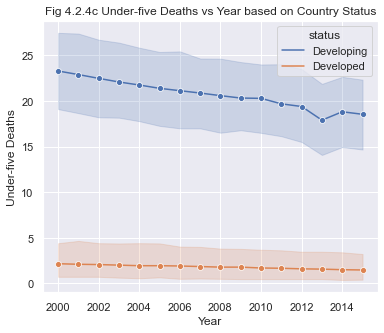

In [22]:
ax = sns.lineplot(x='year', y='under-five_deaths', hue='status', data=wins_df, marker='o')
plt.title('Fig 4.2.4c Under-five Deaths vs Year based on Country Status')
plt.xlabel('Year')
plt.ylabel('Under-five Deaths')
plt.show()

From the results in terms of income composition of resources below, developing countries had a significant increase in income composition of resources. On the other hand, developed countries only had a gradual increase in income composition of resources, though the value is still higher than developing countries.

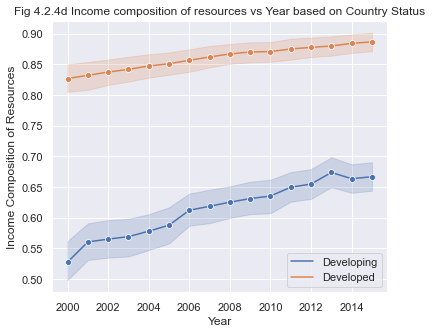

In [23]:
ax = sns.lineplot(x='year', y='income_composition_of_resources', hue='status', data=wins_df, marker='o')
plt.title('Fig 4.2.4d Income composition of resources vs Year based on Country Status')
plt.xlabel('Year')
plt.ylabel('Income Composition of Resources')
ax.legend(loc=4)
plt.show()

The below graph show that both developed/developing countries have a gradual increase in schooling years over time, with developing having a slightly steeper increase. Developed countries have a higher average number of schooling years than developing even as time passes by.

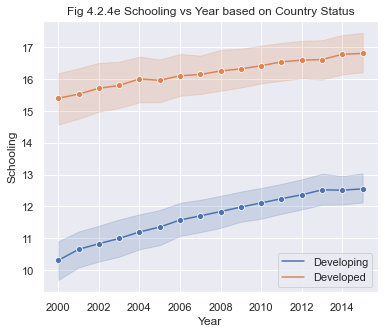

In [24]:
ax = sns.lineplot(x='year', y='schooling', hue='status', data=wins_df, marker='o')
plt.title('Fig 4.2.4e Schooling vs Year based on Country Status')
plt.xlabel('Year')
plt.ylabel('Schooling')
ax.legend(loc=4)
plt.show()

From these five graphs, it can be seen that developed countries have a significantly more positive or negative value than developing countries for the variables that affect life expectancy the most. It can be inferred that more years of education, better utilization of resources, lower under-five deaths, lower adult death rate and lower deaths caused by Hiv/aids will increase life expectancy, thus explaining why developed countries have a higher life expectancy than developing countries. As for why there is a steeper increase/decrease in the values for developing countries, it may be because there is more room for improvement and advancement. Developing countries can use the current technologies to increase/decrease the variables more, while developed countries will have to spend time researching on new methods.

### 4.3 Fitting Distributions

#### 4.3.1 Life Expectancy

The life expectancy targeting variable is fitted into different distributions and it can be seen from the table below that a weibull mixture model best fit the data. This is because it has the highest long likelihood and the lowest AIC (Akaike's Information Criteria) and BIC (Bayesian Information Criteria) compared to other distributions.

In [25]:
list1 = df['life_expectancy'].to_list()
le_list = [x for x in list1 if pd.isnull(x) == False and x != 'nan']

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 2928/0 (0% right censored) 

   Distribution   Alpha    Beta   Gamma Alpha 1  Beta 1 Alpha 2  Beta 2 Proportion 1 DS      Mu    Sigma    Lambda  Log-likelihood    AICc     BIC      AD   optimizer
Weibull_Mixture                         55.3022 13.9675 74.8904 11.4175      0.13268                                      -10522.5   21055 21084.9 5.24645         TNC
     Weibull_CR                         75.9478 7.54214 81.4657 15.5884                                                   -10587.5   21183 21206.9 10.8227 nelder-mead
      Gumbel_2P                                                                         73.6659  7.78766                  -10607.5 21219.1 21231.1 10.8699         TNC
     Weibull_2P 73.2011 9.05259                                                                                             -10608 21220.1   21232 19.8204         TNC
     Weibull_DS 73.2011 9.05259                            

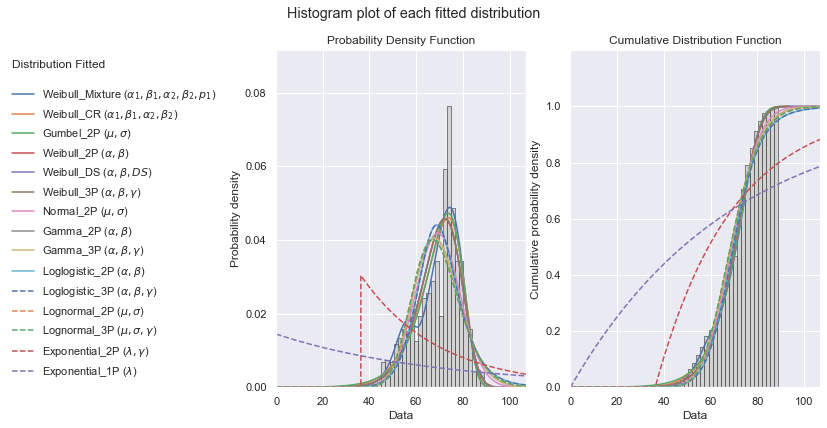

In [26]:
from reliability.Fitters import Fit_Everything
Fit_Everything(failures=le_list, show_histogram_plot=True, show_probability_plot=False, show_PP_plot=False, show_best_distribution_probability_plot=False)

Below shows the weibull mixure model for the life expectancy variable and the results of the model. From the results, we can see that it has 95% of confidence interval towards the estimation. The log likelihood of the weibull mixture model is -10522.5 (highest among other distrubutions) and the AIC and BIC is 21055 and 21084.9 respectively (lowest among other distrubutions). The data points are nearly distributed along the weibull mixture model line except for a few data points at the beginning.

Results from Fit_Weibull_Mixture (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 2928/0 (0% right censored) 

   Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
     Alpha 1         55.3022        0.399466   54.5248   56.0907
      Beta 1         13.9675        0.840833    12.413   15.7166
     Alpha 2         74.8904        0.178217   74.5419   75.2405
      Beta 2         11.4175        0.260255   10.9186   11.9392
Proportion 1         0.13268       0.0112516  0.112137  0.156325 

Goodness of fit    Value
 Log-likelihood -10522.5
           AICc    21055
            BIC  21084.9
             AD  5.24645 



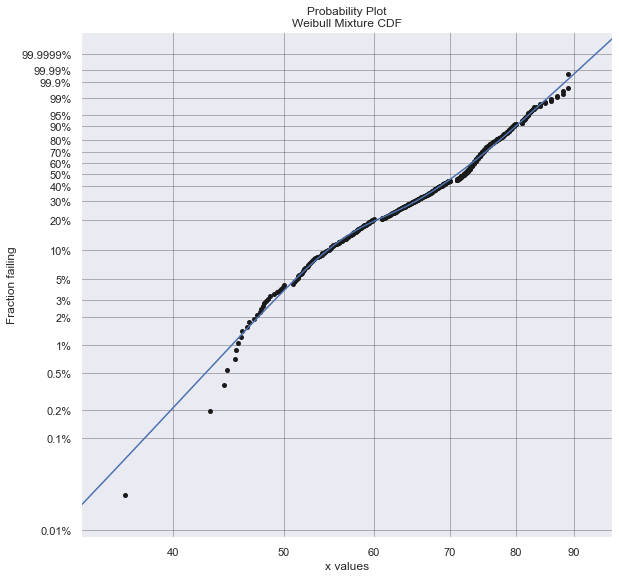

In [27]:
from reliability.Distributions import Weibull_Distribution
from reliability.Probability_plotting import plot_points
from reliability.Fitters import Fit_Weibull_Mixture
import matplotlib.pyplot as plt
wb = Fit_Weibull_Mixture(failures=le_list)
plt.show()

### 4.4 Features Selections

Based on the Correlation Matrix Heatmap from the EDA, the variables that are highly correlated to Life Expectancy (depending variable) are chosen for the predictive model and peformance metrics. The variables with correlation of less than -0.6 and more than 0.6 includes 'hiv/aids', 'income_composition_of_resources', 'adult_mortality', 'schooling' and 'under-five_deaths'. 

Below is the final heatmap with the five attributes chosen along with the depending variable (Life Expectancy).

In [28]:
final_vars = ['life_expectancy','adult_mortality', 'income_composition_of_resources', 'schooling', 'hiv/aids', 'under-five_deaths']

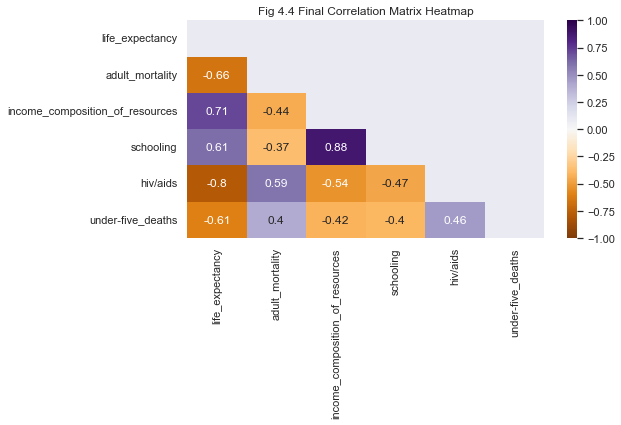

In [29]:
mask = np.triu(wins_df[final_vars].corr())
plt.figure(figsize=(8,4))
sns.heatmap(wins_df[final_vars].corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='PuOr', mask=mask)
plt.ylim(6, 0)
plt.title('Fig 4.4 Final Correlation Matrix Heatmap')
plt.show()

### 4.5 Predictive Models and Performance Metrics

The Life Expectancy dataset consist of a target variable which is life_expectancy. Life_expectancy is the variable where this study will model and predict it based on the variables chosen in the features selction process ('adult_mortality', 'income_composition_of_resources', 'schooling', 'hiv/aids', 'under-five_deaths'). Life_expectancy variable will be supervising the predictive model building and performance metrics comparing process. Hence, supervised machine learning algorithms are used to build the predictive models.   

Since life_expectancy and the other five variables are numerical variables, regression algorithms are used. The algorithms used in this study to create the predicitive models are Random Forest Regression, Gradient Boosting Regression, Decision Tree Regression, KNN Regression and Multiple Linear Regression. To demonstrate perfect prediction where all forecast values are the actual values, an x=y line is constructed. As seen in the graphs, the best predictive model for the dataset is the random forest regression as the data points are scattered closest to the line compared to others. The rank from the best to the worst is followed by Gradient Boosting Regression, Decision Tree Regression, KNN Regression and Multiple Linear Regression.

In [30]:
# Separate predicting attribute into y
# Splitting the datasets into train and test
array = wins_df.values
y= array[:,3]
x= wins_df[['adult_mortality', 'income_composition_of_resources', 'schooling', 'hiv/aids', 'under-five_deaths']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [31]:
# Predictive model 1: Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

RF = RandomForestRegressor(random_state=0)
#random state is set to 0 to fix the randomness, same results everytime
RF.fit(x_train, y_train)
RF_predict = RF.predict(x_test)

#Performance Metrics
A1=(round(mean_absolute_error(y_test, RF_predict), 2)) 
B1=(round(mean_squared_error(y_test, RF_predict), 2)) 
C1=(round(r2_score(y_test, RF_predict), 2))

<Figure size 216x216 with 0 Axes>

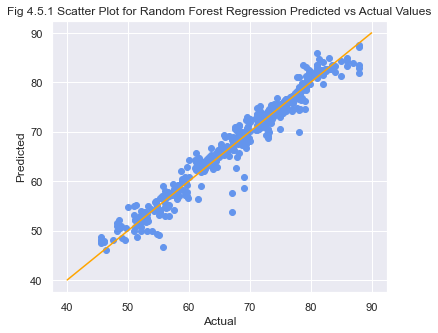

<Figure size 216x216 with 0 Axes>

In [32]:
plt.scatter(y_test,RF_predict, c='#6495ed')
x=40,90
y=40,90
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Fig 4.5.1 Scatter Plot for Random Forest Regression Predicted vs Actual Values")
plt.plot(x,y, color='orange')
plt.figure(figsize=(3,3))

In [33]:
# Predictive model 2: Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

GB = GradientBoostingRegressor()
GB.fit(x_train, y_train)
GB_predict = GB.predict(x_test)

#Performance Metrics
A2=(round(mean_absolute_error(y_test, GB_predict), 2)) 
B2=(round(mean_squared_error(y_test, GB_predict), 2)) 
C2=(round(r2_score(y_test, GB_predict), 2))

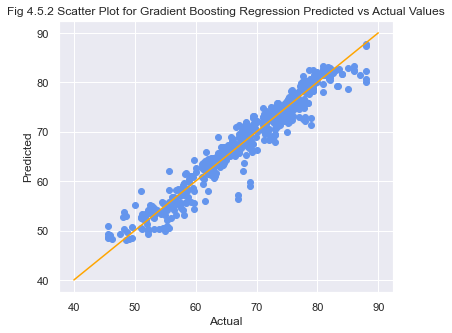

In [34]:
plt.scatter(y_test,GB_predict, c='#6495ed')
x=40,90
y=40,90
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Fig 4.5.2 Scatter Plot for Gradient Boosting Regression Predicted vs Actual Values")
plt.plot(x,y, color='orange')

In [35]:
# Predictive model 3: Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)
DT_predict = DT.predict(x_test)

#Performance Metrics
A3=(round(mean_absolute_error(y_test, DT_predict), 2)) 
B3=(round(mean_squared_error(y_test, DT_predict), 2)) 
C3=(round(r2_score(y_test, DT_predict), 2))

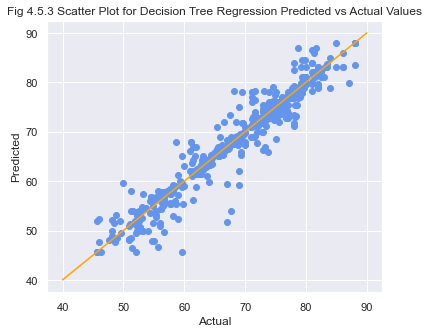

In [36]:
plt.scatter(y_test,DT_predict, c='#6495ed')
x=40,90
y=40,90
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Fig 4.5.3 Scatter Plot for Decision Tree Regression Predicted vs Actual Values")
plt.plot(x,y, color='orange')

In [37]:
# Predictive model 4: KNN Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

KNN = KNeighborsRegressor()
KNN.fit(x_train, y_train)
KNN_predict = KNN.predict(x_test)

#Performance Metrics
A4=(round(mean_absolute_error(y_test, KNN_predict), 2)) 
B4=(round(mean_squared_error(y_test, KNN_predict), 2)) 
C4=(round(r2_score(y_test, KNN_predict), 2))

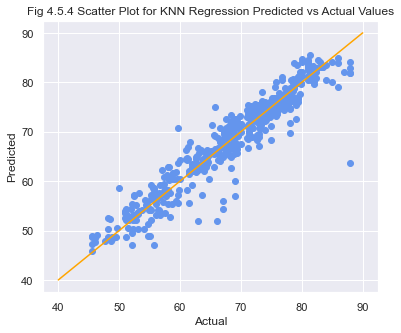

In [38]:
plt.scatter(y_test,KNN_predict, c='#6495ed')
x=40,90
y=40,90
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Fig 4.5.4 Scatter Plot for KNN Regression Predicted vs Actual Values")
plt.plot(x,y, color='orange')

In [39]:
# Predictive model 5: Multiple Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

LR = LinearRegression()
LR.fit(x_train, y_train)
LR_predict = LR.predict(x_test)

#Performance Metrics
A5=round(mean_absolute_error(y_test, LR_predict), 2)
B5=(round(mean_squared_error(y_test, LR_predict), 2)) 
C5=(round(r2_score(y_test, LR_predict), 2))

Text(0.5, 1.0, 'Fig 4.5.5 Scatter Plot for Multiple Linear Regression Predicted vs Actual Values')

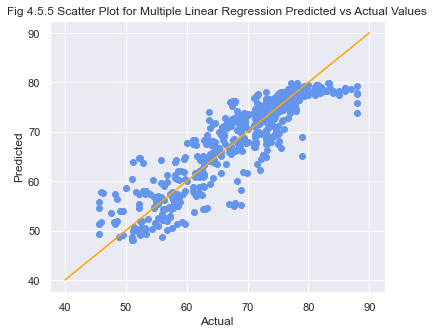

In [40]:
plt.scatter(y_test,LR_predict, color='#6495ed')
x=40,90
y=40,90
plt.plot(x,y, color='orange')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Fig 4.5.5 Scatter Plot for Multiple Linear Regression Predicted vs Actual Values")

The table below shows the mean absolute error, mean squared error and r2 score of different predictive model. As seen in the table, the best predictive model for the dataset is the random forest regression as it has the highest R2 score, 0.96. It has the closest r squared score to 1, so it is the most perfect model trained compared to others. This is also shown in the scatter plot where the predicted vs actual results from random forest fits best on the line compared to other models (Fig 4.5.1). The random forest regression model also has the least mean absolute error and mean squared error which is 1.19 and 3.45 respectively. A low mean absolute error indicates that the mean over the absolute differences between true and predicted values is low in the model which makes the model more accurate. A low mean squared error indicates that the distance of the data points and the fitted line is very close and also makes the model more accurate. The second best predictive model is gradient boosting regression followed by decision tree regression with R squared score of 0.94 and 0.92 respectively. Both of these model is counted as accurate because their r squared value is above 0.9.  

In [41]:
print("Table 4.5 Mean Absolute Error, Mean Squared Error and R2 Score for the Predictive Models")

Table 4.5 Mean Absolute Error, Mean Squared Error and R2 Score for the Predictive Models


In [42]:
#Performance Metrics Data Frame
data={'Predictive Model':['Random Forest Regression','Gradient Boosting Regression','Decision Tree Regression','KNN Regression','Multiple Linear Regression'], 'Mean Absolute Error':[A1,A2,A3,A4,A5], 'Mean Squared Error':[B1,B2,B3,B4,B5], 'R2 Score': [C1, C2, C3,C4,C5]}
PM=pd.DataFrame(data)
PM

,Predictive Model,Mean Absolute Error,Mean Squared Error,R2 Score
0,Random Forest Regression,1.19,3.45,0.96
1,Gradient Boosting Regression,1.67,5.04,0.94
2,Decision Tree Regression,1.51,6.8,0.92
3,KNN Regression,1.85,7.89,0.91
4,Multiple Linear Regression,3.1,16.82,0.81


As compared to results in a study done by Luke Sheehan [20], that study used machine learning algorithms for feature selections which is to find out the variables that are more correlated to the target variable, life expectancy. Linear regression, random forest algorithm, kmeans clustering analysis and other methods are used to narrow down the variables and visualize the relationship between the target variable and the variables. However, our study brings the investigation to another level by aiming to find out the best predictive model for the highly correlated variables. The features selection in our study is done by selecting the variables that have correlation of more than 0.6 or less than -0.6 with life expectancy. Our study went further than feature selections and focus on using different machine learning algorithms to create and compare models that have higher performance metrics for futher prediction and analysis. To conclude, we find out that random forest regrassion is the best predictive model for the variables selected. A study by Faisal et al. with the same aim of finding the best model for predicting life expectancy also shows that random forest regression is the best model among the others, with an R2 score of 0.96 [18].

## 5. Limitations and future study

There are some possible limitations of the study. Firstly, the quality of the findings may be low due to the poor quality of the data. The chosen dataset contains a large number of outliers and extreme values that make no sense. Even if the outliers have been replaced, the extreme numbers still had an impact on the general data because the columns' mean was used to replace them. As a result, the data findings may not correctly reflect the life expectancy of people all around the world.

Second, the dataset's variables are quite generic. The research is restricted to the dataset's 21 features. Furthermore, only 5 features are chosen to be used in the predictive models out of the 21. There may be other, more essential factors affecting a person's life expectancy that are not taken into account. As a result, the aforementioned factors may be just the few of many that influence an individual's life expectancy.

A better dataset with more reliable data should be used for future study. Before selecting a dataset, it is necessary to examine and comprehend its features and statistics. Aside from that, when researching life expectancy, additional aspects can be included. For example, personal factors such as exercise hours and dietary habits.

## 6. Conclusion

As the global life expectancy is constantly increasing every year which is currently estimated to be 72.98 years, the global average life expectancy today is higher than any country back in 1950 [21]. Human development is continuously improving and the world had made a huge effort in different areas to increase life expectancy. This study investigates and analyzed human life expectancy based on various factors to find out the factors that are correlated to the gain and loss of life expectancy. This study successfully determined an accurate model for life expectancy predictions based on different variables selected by comparing their correlation matrix. Data preprocessing was firstly carried out to clean the data by detecting and removing the outliers and missing values. Exploratory data analysis (EDA) including univariate, bivariate and multivariate analysis was done to analyze the data sets and highlights their main characteristics. The life expectancy variable is also fitted into distribution and different predictive models were created and their performance metrics were compared. It is found that the greater the income composition of resources and schooling years, and the lower the adult mortality rate (chance of dying between 15 and 60 years per 1000 population), under-five deaths, and deaths caused by HIV/AIDS, the longer people live. This is because higher income and schooling years may lead to a better living standard and the lower deaths due to health-related and mortality factors may lead to prolongation in longevity. With the use of machine learning algorithms, Random Forest Regression was the best predictive model because it has high performance and accuracy which is most suitable for further prediction and analysis. It has an R2 score of 0.96, mean squared error of 3.45 and mean absolute error of 1.19. Thus, the findings on the factors that are highly correlated with life expectancy and the predictive models used should be taken into further research and analysis to find more significant ways to efficiently extend world life expectancy. 

## 7. References


[1] B. Ciabiada-Bryła, I. Maniecka-Bryła and P. Paciej-Gołębiowska, "Years of life lost due to alcohol-related mortality: A nationwide population study in Poland, 1999–2017", Drug and Alcohol Dependence, vol. 227, 2021. Available: 10.1016/j.drugalcdep.2021.108990.

[2] Bitesize "Factors influencing global development - Why some countries are richer than others - OCR - GCSE Geography Revision - OCR - BBC Bitesize", BBC Bitesize, 2022. [Online]. Available: https://www.bbc.co.uk/bitesize/guides/zxw2cwx/revision/4#:~:text=These%20include%20low%20levels%20of,and%20infrastructure%20may%20be%20insufficient. [Accessed: 22- Jun- 2022].

[3] C, Nicklin., L,Plonsky., "Outliers in L2 Research in Applied Linguistics: A Synthesis and Data Re-Analysis", Annual Review of Applied Linguistics, vol. 40 pp. 26-55, June. 2020. doi: https://doi.org/10.1017/S0267190520000057 [Online]. Available: https://www.cambridge.org/core/journals/annual-review-of-applied-linguistics/article/abs/outliers-in-l2-research-in-applied-linguistics-a-synthesis-and-data-reanalysis/8C91F49ECD92305E3FE63F5592BD961B

[4] C. Bilynkievycz dos Santos, B. Pedroso, A. Margarete Guimaraes, D. Ribeiro Carvalho and L. Alberto Pilatti, "Forecasting of Human Development Index of Latin American Countries Through Data Mining Techniques", IEEE Latin America Transactions, vol. 15, no. 9, pp. 1747-1753, 2017. Available: 10.1109/tla.2017.8015082.

[5] D, Landup. "Seaborn Line Plot - Tutorial and Examples." stackabuse.com. https://stackabuse.com/seaborn-line-plot-tutorial-and-examples/ (accessed June 9, 2022)

[6] D, Sherpa. "Univariate, Bivariate and Multivariate Analysis." medium.com. https://medium.com/analytics-vidhya/univariate-bivariate-and-multivariate-analysis-8b4fc3d8202c (accessed June 9, 2022)

[7] E. Crimmins, "Recent trends and increasing differences in life expectancy present opportunities for multidisciplinary research on aging", Nature Aging, vol. 1, no. 1, pp. 12-13, 2021. doi: https://doi.org/10.1038/s43587-020-00016-0. [Online]

[8] E. Yinka Sango-Coker and M. Bein, "The Impact of Healthcare spending on Life Expectancy: Evidence from Selected West African Countries", African Journal of Reproductive Health December, vol. 22, no. 4, pp. 64-71, 2018. Available: 10.29063/ajrh2018/v22i4.7 [Accessed 22 June 2022].

[9] G. Miladinov, "Socioeconomic development and life expectancy relationship: evidence from the EU accession candidate countries", Genus, vol. 76, no. 1, 2020. Available: 10.1186/s41118-019-0071-0.

[10] H. Chen, G. Chen, X. Zheng and Y. Guo, "Contribution of specific diseases and injuries to changes in health adjusted life expectancy in 187 countries from 1990 to 2013: retrospective observational study", BMJ, 2019. Available: 10.1136/bmj.l969.

[11] I, L, Murillo. "The life expectancy: what is it and why does it matter." cenie.eu. https://cenie.eu/en/blogs/age-society/life-expectancy-what-it-and-why-does-it-matter (accessed 4 June 2022)

[12] I. Karacan, B. Sennaroglu and O. Vayvay, "Analysis of life expectancy across countries using a decision tree", Eastern Mediterranean Health Journal, vol. 26, no. 2, pp. 143-151, 2020. Available: 10.26719/2020.26.2.143.

[13] J, M, Bezy. "life expectancy | Definition & Facts." britannica.com. https://www.britannica.com/science/life-expectancy (accessed June 4, 2022)

[14] J. Ho and A. Hendi, "Recent trends in life expectancy across high income countries: retrospective observational study", BMJ, vol. 362, p. k2562, 2018. Available: 10.1136/bmj.k2562.

[15] J. Mackenbach et al., "Determinants of inequalities in life expectancy: an international comparative study of eight risk factors", The Lancet Public Health, vol. 4, no. 10, pp. e529-e537, 2019. Available: 10.1016/s2468-2667(19)30147-1.

[16] J. Marcus et al., "Comparison of Overall and Comorbidity-Free Life Expectancy Between Insured Adults With and Without HIV Infection, 2000-2016", JAMA Network Open, vol. 3, no. 6, p. e207954, 2020. Available: 10.1001/jamanetworkopen.2020.7954.

[17] J. Portilla-Tamarit, S. Reus, I. Portilla, M. Fuster Ruiz-de-Apodaca and J. Portilla, "Impact of Advanced HIV Disease on Quality of Life and Mortality in the Era of Combined Antiretroviral Treatment", Journal of Clinical Medicine, vol. 10, no. 4, p. 716, 2021. Available: 10.3390/jcm10040716.

[18] K,Faisal., D,Alomari., H,Alasmari., H,Alghamdi., K,Saeedi. "Life Expectancy Estimation based on Machine Learning and Structured Predictors," AISS 2021: 2021 3rd International Conference on Advanced Information Science and System (AISS 2021), Article No. 70, pp. 1–8, January. 2022. Accessed: June. 21, 2022. doi:https://doi.org/10.1145/3503047.3503122 [Online]

[19] K. Foreman et al., "Forecasting life expectancy, years of life lost, and all-cause and cause-specific mortality for 250 causes of death: reference and alternative scenarios for 2016–40 for 195 countries and territories", The Lancet, vol. 392, no. 10159, pp. 2052-2090, 2018. Available: 10.1016/s0140-6736(18)31694-5.

[20] L. Sheehan, "Life Expectancy Project Technical Report", Undergraduate, National College of Ireland, 2021.

[21] M, Roser., E,Ortiz-Ospina., H,Ritchie. "Life Expectancy. Our World in Data." ourworldindata.org. https://ourworldindata.org/life-expectancy (accessed June 19, 2022)

[22] M, Waskom. "seaborn.heatmap — seaborn 0.11.2 documentation." seaborn.pydata.org. https://seaborn.pydata.org/generated/seaborn.heatmap.html (accessed June 9, 2022)

[23] Matplotlib. "matplotlib.pyplot.boxplot." matplotlib.org. https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html (accessed June, 7 2022) 

[24] O. Östergren, P. Martikainen, L. Tarkiainen, J. Elstad and H. Brønnum-Hansen, "Contribution of smoking and alcohol consumption to income differences in life expectancy: evidence using Danish, Finnish, Norwegian and Swedish register data", Journal of Epidemiology and Community Health, vol. 73, no. 4, pp. 334-339, 2019. doi: 10.1136/jech-2018-211640.

[25] Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V. and Vanderplas, J. and Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, E. “Scikit-learn: Machine Learning in Python”, Journal of Machine Learning Research, 12(1), 2825-2830, 2021. Available: https://www.jmlr.org/papers/volume12/pedregosa11a/pedregosa11a.pdf

[26] SciPy. "scipy.stats.mstats.winsorize." scipy.org. https://docs.scipy.org/doc/scipy/index.html (accessed June 5, 2022)

[27] World Health Organization. "GHE: Life expectancy and healthy life expectancy." who.int. https://www.who.int/data/gho/data/themes/mortality-and-global-health-estimates/ghe-life-expectancy-and-healthy-life-expectancy#:~:text=Globally%2C%20life%20expectancy%20has%20increased,reduced%20years%20lived%20with%20disability. (accessed June 4, 2022)

[28] X. Cao et al., "A comparative, correlate analysis and projection of global and regional life expectancy, healthy life expectancy, and their GAP: 1995-2025", Journal of Global Health, vol. 10, no. 2, 2020. Available: 10.7189/jogh.10.020407.

[29] Y. Zhang, Y. Saito and E. Crimmins, "Changing Impact of Obesity on Active Life Expectancy of Older Americans", The Journals of Gerontology: Series A, vol. 74, no. 12, pp. 1944-1951, 2019. Available: 10.1093/gerona/glz133.

[30] Zach, "What is Univariate Analysis? (Definition & Example)." statology.org. https://www.statology.org/univariate-analysis/ (accessed June 9, 2022)